In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import warnings
import scipy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

2022-03-10 10:36:47.276863: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-10 10:36:47.276898: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Reading the 20-21 FPL season data
season_1 = pd.read_csv("20-21 FPL season.csv", index_col=[0])

In [3]:
season_1.columns

Index(['first_name', 'second_name', 'position', 'assists', 'goals_scored',
       'total_points', 'threat_rank', 'influence_rank', 'creativity_rank',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'now_cost', 'points_per_million'],
      dtype='object')

In [4]:
season_1.head()

,first_name,second_name,position,assists,goals_scored,total_points,threat_rank,influence_rank,creativity_rank,minutes,...,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
0,Mesut,Özil,MID,0,0,0,713,713,713,0,...,0.0,0.0,0,0,0.0,0,0,0,6.7,0.000000
1,Sokratis,Papastathopoulos,DEF,0,0,0,667,682,674,0,...,0.0,0.0,0,0,0.0,0,0,0,4.8,0.000000
2,David,Luiz Moreira Marinho,DEF,0,1,41,244,264,346,1396,...,250.6,144.0,0,230,43.9,3,1,1,5.4,7.592593
3,Pierre-Emerick,Aubameyang,MID,3,10,131,34,136,101,2330,...,493.8,823.0,11,358,167.4,10,0,2,11.3,11.592920
4,Cédric,Soares,DEF,1,0,28,330,366,249,744,...,110.8,66.0,3,125,29.2,2,0,1,4.6,6.086957


In [5]:
# Checking for missing values
season_1.isnull().sum()

first_name            0
second_name           0
position              0
assists               0
goals_scored          0
total_points          0
threat_rank           0
influence_rank        0
creativity_rank       0
minutes               0
goals_conceded        0
creativity            0
influence             0
threat                0
bonus                 0
bps                   0
ict_index             0
clean_sheets          0
red_cards             0
yellow_cards          0
now_cost              0
points_per_million    0
dtype: int64

In [6]:
# Checking for the data types of dataframe
season_1.dtypes

first_name             object
second_name            object
position               object
assists                 int64
goals_scored            int64
total_points            int64
threat_rank             int64
influence_rank          int64
creativity_rank         int64
minutes                 int64
goals_conceded          int64
creativity            float64
influence             float64
threat                float64
bonus                   int64
bps                     int64
ict_index             float64
clean_sheets            int64
red_cards               int64
yellow_cards            int64
now_cost              float64
points_per_million    float64
dtype: object

In [7]:
# Reading the 19-20 FPL season data
season_2 = pd.read_csv("19-20 FPL season.csv", index_col=[0])

In [8]:
season_2.head(5)

,first_name,second_name,position,assists,goals_scored,total_points,threat_rank,influence_rank,creativity_rank,minutes,...,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
0,Shkodran,Mustafi,DEF,2,0,43,234,257,352,1205,...,277.2,155.0,2,242,47.9,4,0,2,5.1,8.431373
1,Héctor,Bellerín,DEF,0,1,44,275,322,301,1156,...,187.8,103.0,4,204,37.0,4,0,2,5.2,8.461538
2,Sead,Kolasinac,DEF,2,0,55,305,264,215,1694,...,269.6,81.0,1,331,53.0,4,0,4,5.2,10.576923
3,Ainsley,Maitland-Niles,DEF,2,0,41,337,241,216,1382,...,301.8,58.0,3,244,53.6,3,1,4,4.5,9.111111
4,Sokratis,Papastathopoulos,DEF,0,2,57,266,166,365,1696,...,436.2,110.0,5,305,58.5,4,0,6,4.8,11.875000


In [9]:
# Checking for missing values
season_2.isnull().sum()

first_name            0
second_name           0
position              0
assists               0
goals_scored          0
total_points          0
threat_rank           0
influence_rank        0
creativity_rank       0
minutes               0
goals_conceded        0
creativity            0
influence             0
threat                0
bonus                 0
bps                   0
ict_index             0
clean_sheets          0
red_cards             0
yellow_cards          0
now_cost              0
points_per_million    0
dtype: int64

In [10]:
# Checking for the data types of dataframe
season_2.dtypes

first_name             object
second_name            object
position               object
assists                 int64
goals_scored            int64
total_points            int64
threat_rank             int64
influence_rank          int64
creativity_rank         int64
minutes                 int64
goals_conceded          int64
creativity            float64
influence             float64
threat                float64
bonus                   int64
bps                     int64
ict_index             float64
clean_sheets            int64
red_cards               int64
yellow_cards            int64
now_cost              float64
points_per_million    float64
dtype: object

In [11]:
# Reading the 18-19 FPL season data
season_3 = pd.read_csv("18-19 FPL season.csv", index_col=[0])

In [12]:
season_3.head(5)

,first_name,second_name,position,assists,goals_scored,total_points,threat_rank,influence_rank,creativity_rank,minutes,...,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
0,Petr,Cech,GK,0,0,24,441.0,304.0,471.0,585,...,205.0,0.0,3,130,20.4,1,0,0,4.7,5.106383
1,Bernd,Leno,GK,0,0,106,441.0,34.0,471.0,2835,...,807.2,0.0,5,568,80.5,6,0,0,4.9,21.632653
2,Laurent,Koscielny,DEF,0,3,62,287.0,158.0,382.0,1329,...,456.4,105.0,8,319,59.1,3,0,1,5.4,11.481481
3,Héctor,Bellerín,DEF,5,0,60,149.0,271.0,196.0,1532,...,261.6,280.0,5,304,73.7,4,0,3,5.3,11.320755
4,Nacho,Monreal,DEF,4,1,77,181.0,186.0,197.0,1860,...,413.2,224.0,7,392,83.4,5,0,5,5.4,14.259259


In [13]:
# Checking for missing values
season_3.isnull().sum()

first_name            0
second_name           0
position              0
assists               0
goals_scored          0
total_points          0
threat_rank           0
influence_rank        0
creativity_rank       0
minutes               0
goals_conceded        0
creativity            0
influence             0
threat                0
bonus                 0
bps                   0
ict_index             0
clean_sheets          0
red_cards             0
yellow_cards          0
now_cost              0
points_per_million    0
dtype: int64

In [14]:
# Checking for the data types of dataframe
season_3.dtypes

first_name             object
second_name            object
position               object
assists                 int64
goals_scored            int64
total_points            int64
threat_rank           float64
influence_rank        float64
creativity_rank       float64
minutes                 int64
goals_conceded          int64
creativity            float64
influence             float64
threat                float64
bonus                   int64
bps                     int64
ict_index             float64
clean_sheets            int64
red_cards               int64
yellow_cards            int64
now_cost              float64
points_per_million    float64
dtype: object

In [15]:
# Joining the three dataframes i.e season1, season2 and season3
combined_data = pd.concat([season_1, season_2, season_3], axis=0)

In [16]:
# Ensuring the dataframes have been joined properly
combined_data.isnull().sum()

first_name            0
second_name           0
position              0
assists               0
goals_scored          0
total_points          0
threat_rank           0
influence_rank        0
creativity_rank       0
minutes               0
goals_conceded        0
creativity            0
influence             0
threat                0
bonus                 0
bps                   0
ict_index             0
clean_sheets          0
red_cards             0
yellow_cards          0
now_cost              0
points_per_million    0
dtype: int64

In [17]:
combined_data.columns

Index(['first_name', 'second_name', 'position', 'assists', 'goals_scored',
       'total_points', 'threat_rank', 'influence_rank', 'creativity_rank',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'now_cost', 'points_per_million'],
      dtype='object')

In [18]:
# Removing the threat, influence, creativity rank columns
combined_data.drop(['threat_rank', 'influence_rank', 'creativity_rank'], axis=1, inplace=True)

In [19]:
combined_data.shape

(2003, 19)

## Explaratory Data Analysis

In [20]:
# Statistical Analysis
combined_data.describe(include="all")

,first_name,second_name,position,assists,goals_scored,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
count,2003,2003,2003,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000,2003.000000
unique,673,989,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,James,Sánchez,MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,31,8,824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.367449,1.510235,46.675487,1122.107838,17.189216,163.452921,249.803794,185.757863,3.648028,205.994508,59.869446,3.586121,0.069895,1.794309,5.038642,8.523107
std,NaN,NaN,NaN,2.432049,3.205307,50.253290,1101.697200,17.333672,239.560551,272.733998,299.957234,5.794123,216.973160,71.325629,4.229192,0.268394,2.403508,1.203028,8.437218
min,NaN,NaN,NaN,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,3.800000,-0.750000
25%,NaN,NaN,NaN,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.300000,0.000000,0.000000,3.000000,0.200000,0.000000,0.000000,0.000000,4.300000,0.222222
50%,NaN,NaN,NaN,0.000000,0.000000,33.000000,841.000000,13.000000,58.300000,155.200000,61.000000,1.000000,135.000000,37.700000,2.000000,0.000000,1.000000,4.700000,6.666667
75%,NaN,NaN,NaN,2.000000,1.000000,78.000000,2051.000000,30.000000,246.450000,440.000000,241.500000,5.000000,359.000000,92.950000,6.000000,0.000000,3.000000,5.300000,15.051020


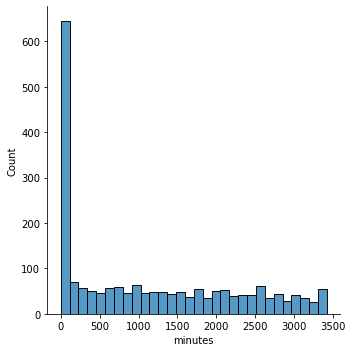

In [21]:
# Checking the distribution of the minutes played
sns.displot(combined_data["minutes"], bins=30)
plt.show()

In [22]:
# Dropping layers that played less than 900( Approximately 10 games) over the course of the season
filtered_data = combined_data[combined_data["minutes"]>900]

In [23]:
filtered_data.shape

(978, 19)

In [24]:
filtered_data.describe(include="all")

,first_name,second_name,position,assists,goals_scored,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
count,978,978,978,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000,978.000000
unique,394,524,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,James,Davies,MID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,21,6,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.578732,2.888548,87.151329,2100.267894,31.637014,307.435992,473.270552,347.323108,7.077710,387.051125,112.770859,6.867076,0.124744,3.337423,5.488855,15.735370
std,NaN,NaN,NaN,2.970761,4.116379,42.559701,733.576828,13.419159,272.200294,226.605458,358.069065,6.674482,172.426524,68.445749,3.823207,0.351603,2.570331,1.444557,6.156133
min,NaN,NaN,NaN,0.000000,0.000000,9.000000,907.000000,3.000000,0.000000,51.600000,0.000000,0.000000,29.000000,20.000000,0.000000,0.000000,0.000000,3.800000,2.045455
25%,NaN,NaN,NaN,0.000000,0.000000,54.000000,1465.000000,21.000000,102.025000,293.450000,104.000000,2.000000,253.000000,66.250000,4.000000,0.000000,1.000000,4.600000,10.909091
50%,NaN,NaN,NaN,2.000000,1.000000,78.000000,2071.000000,31.000000,245.150000,445.900000,228.500000,5.000000,364.000000,94.200000,6.000000,0.000000,3.000000,5.100000,15.227273
75%,NaN,NaN,NaN,4.000000,4.000000,114.000000,2677.250000,41.000000,429.700000,598.900000,444.750000,10.000000,504.000000,142.125000,9.000000,0.000000,5.000000,5.800000,20.210595


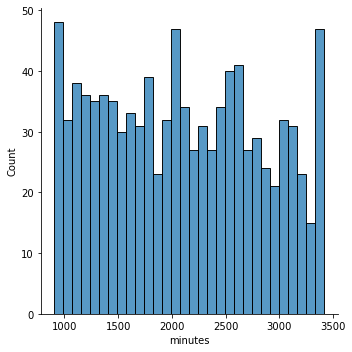

In [25]:
# Getting the distribution of the players left
sns.displot(filtered_data["minutes"], bins = 30)
plt.show()

In [26]:
# Getting the number of players per position
filtered_data["position"].value_counts()

MID    419
DEF    371
FWD    119
GK      69
Name: position, dtype: int64

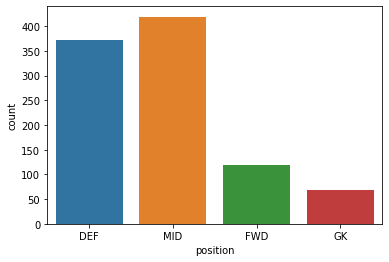

In [27]:
# Plotting the number of players against the positions
sns.countplot(x="position", data=filtered_data)
plt.show()

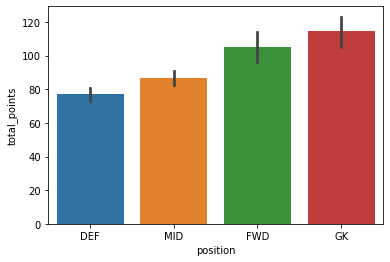

In [28]:
# Plotting the mean of the total_points against the player positions
sns.barplot(x = "position", y="total_points", data=filtered_data, estimator=np.mean)
plt.show()

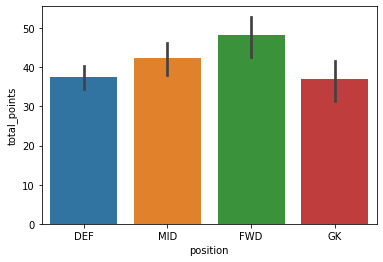

In [29]:
# Plotting the mean of the total_points against the player positions
sns.barplot(x = "position", y="total_points", data=filtered_data, estimator=np.std)
plt.show()

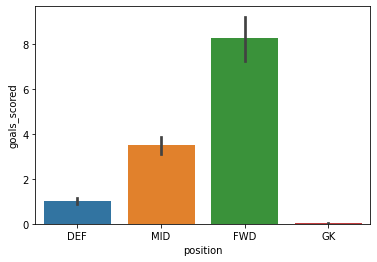

In [30]:
# Plotting the standard deviation of the total_points against the player positions
sns.barplot(x = "position", y="goals_scored", data=filtered_data, estimator=np.mean)
plt.show()

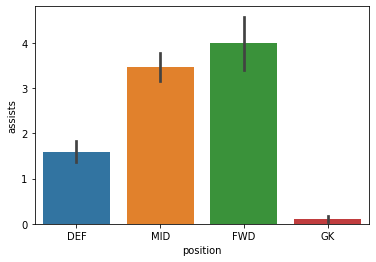

In [31]:
# Plotting the assists against the player positions
sns.barplot(x = "position", y="assists", data=filtered_data, estimator=np.mean)
plt.show()

In [32]:
filtered_data[["assists", "goals_scored", "position", "minutes", "total_points"]].groupby(by="position").describe().transpose()

position                    DEF          FWD           GK          MID
assists      count   371.000000   119.000000    69.000000   419.000000
             mean      1.590296     4.000000     0.101449     3.458234
             std       2.211594     3.207512     0.304135     3.185651
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     2.000000     0.000000     1.000000
             50%       1.000000     3.000000     0.000000     3.000000
             75%       2.000000     5.500000     0.000000     5.000000
             max      15.000000    14.000000     1.000000    23.000000
goals_scored count   371.000000   119.000000    69.000000   419.000000
             mean      1.013477     8.260504     0.014493     3.496420
             std       1.222462     5.733432     0.120386     3.991242
             min       0.000000     0.000000     0.000000     0.000000
             25%       0.000000     3.000000     0.000000     1.000000
             50%       1.000000     7.000000     0.000000     2.000000
             75%       2.000000    12.000000     0.000000     5.000000
             max       8.000000    23.000000     1.000000    22.000000
minutes      count   371.000000   119.000000    69.000000   419.000000
             mean   2117.525606  1958.848739  2776.130435  2013.852029
             std     730.743698   728.931894   750.480295   674.284435
             min     911.000000   907.000000  1080.000000   907.000000
             25%    1494.500000  1269.500000  2295.000000  1445.500000
             50%    2076.000000  1988.000000  3131.000000  1999.000000
             75%    2699.500000  2599.500000  3420.000000  2547.500000
             max    3420.000000  3328.000000  3420.000000  3420.000000
total_points count   371.000000   119.000000    69.000000   419.000000
             mean     76.954178   104.857143   114.666667    86.620525
             std      37.504674    48.503064    37.280600    42.326897
             min       9.000000    29.000000    37.000000    18.000000
             25%      48.000000    64.500000    90.000000    55.000000
             50%      71.000000   100.000000   123.000000    76.000000
             75%      97.000000   136.500000   142.000000   107.500000
             max     213.000000   242.000000   186.000000   259.000000

In [33]:
# Sorting the players according to the total_points scored in descending order
filtered_data.sort_values(by="total_points", axis=0, ascending=False)

,first_name,second_name,position,assists,goals_scored,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
362,Mohamed,Salah,MID,12,22,259,3254,20,973.9,1186.8,2168.0,18,687,432.7,21,0,1,13.2,19.621212
338,Kevin,De Bruyne,MID,23,13,251,2790,22,1990.8,1322.2,1005.0,35,988,432.1,18,0,3,10.6,23.679245
432,Bruno Miguel,Borges Fernandes,MID,14,18,244,3101,36,1414.9,1292.6,1253.0,36,870,396.2,13,0,6,11.3,21.592920
572,Harry,Kane,FWD,14,23,242,3083,39,659.1,1318.2,1585.0,40,880,355.9,12,0,1,11.9,20.336134
167,Eden,Hazard,MID,15,16,238,2918,35,1471.2,1306.2,1546.0,35,879,432.7,12,0,2,11.0,21.636364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Morgan,Schneiderlin,MID,0,0,18,998,20,78.5,143.2,32.0,0,132,25.5,1,1,4,4.4,4.090909
74,Simon,Francis,DEF,0,0,16,964,21,64.4,263.8,72.0,1,161,40.2,1,1,3,4.3,3.720930
9,Stephan,Lichtsteiner,DEF,0,0,14,935,18,61.1,113.0,23.0,0,89,20.0,0,0,3,4.5,3.111111
201,Mamadou,Sakho,DEF,0,0,11,929,21,15.9,179.2,6.0,0,148,20.2,0,1,1,5.0,2.200000


/home/collin/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


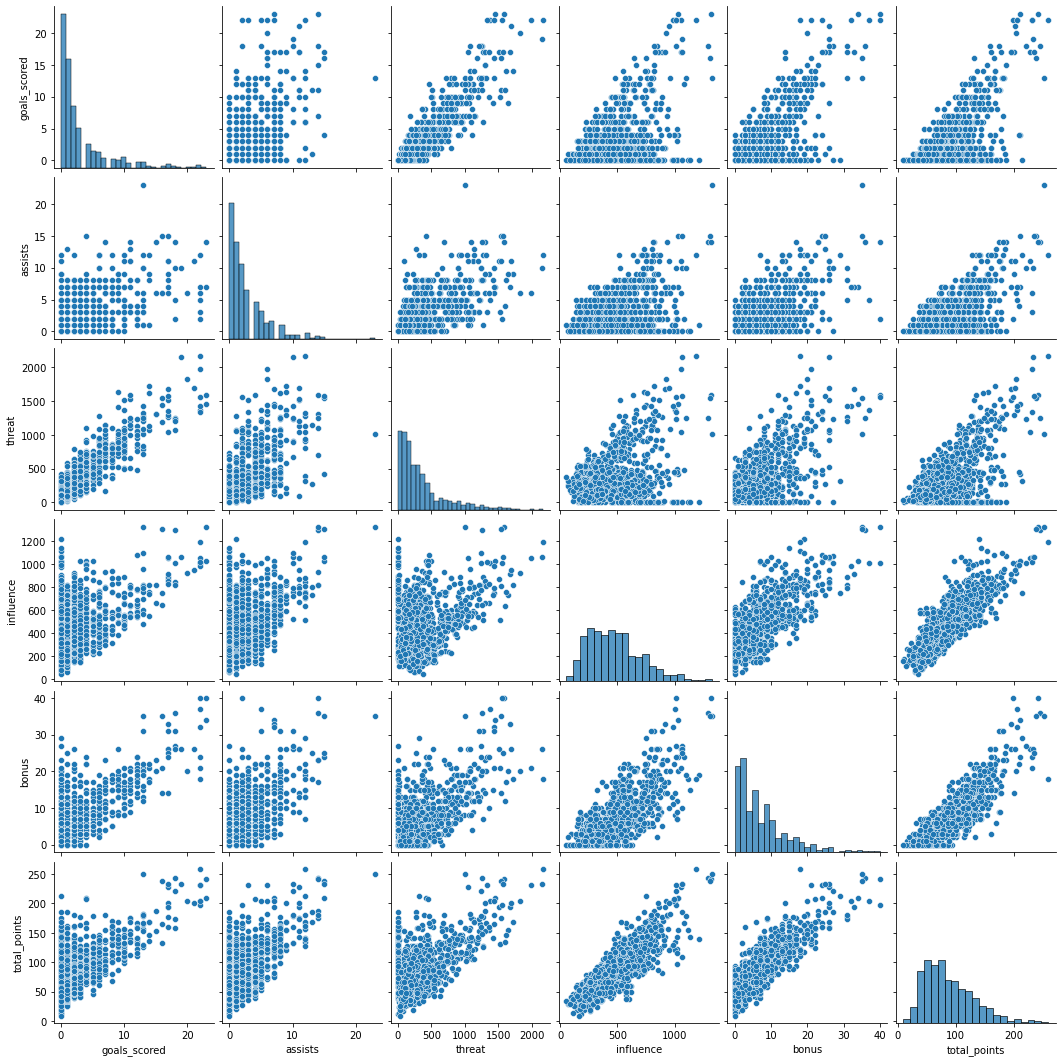

In [34]:
# Analysing the pair plot between some variables from the filtered data
paired = filtered_data[["goals_scored", "assists", "threat", "influence", "bonus", "total_points"]]
paired.reset_index(inplace=True)
paired.drop("index", axis=1, inplace=True)
sns.pairplot(paired)
plt.show()

In [35]:
# Getting the correlation between the variables
paired.corr()

,goals_scored,assists,threat,influence,bonus,total_points
goals_scored,1.000000,0.569749,0.898801,0.466567,0.715741,0.675005
assists,0.569749,1.000000,0.654225,0.422953,0.590330,0.632943
threat,0.898801,0.654225,1.000000,0.400681,0.622501,0.637080
influence,0.466567,0.422953,0.400681,1.000000,0.729804,0.850903
bonus,0.715741,0.590330,0.622501,0.729804,1.000000,0.855634
total_points,0.675005,0.632943,0.637080,0.850903,0.855634,1.000000


In [36]:
# Getting both the correlation between the variables and the confidence levels

In [37]:
scipy.stats.pearsonr(filtered_data["total_points"], filtered_data["influence"])

(0.8509030548932854, 4.102366104254495e-275)

In [38]:
scipy.stats.pearsonr(filtered_data["total_points"], filtered_data["bonus"])

(0.8556338771215855, 2.079483219635718e-281)

In [39]:
scipy.stats.pearsonr(filtered_data["total_points"], filtered_data["threat"])

(0.6370804212031593, 1.8026168659490726e-112)

In [40]:
scipy.stats.pearsonr(filtered_data["total_points"], filtered_data["assists"])

(0.6329428388495593, 1.3334087851598216e-110)

In [41]:
scipy.stats.pearsonr(filtered_data["total_points"], filtered_data["goals_conceded"])

(0.3150485655255924, 5.6279812095500906e-24)

In [42]:
scipy.stats.pearsonr(filtered_data["total_points"], filtered_data["creativity"])

(0.5221407268435067, 1.676848619240964e-69)

In [43]:
scipy.stats.pearsonr(filtered_data["total_points"], filtered_data["ict_index"])

(0.8225130379254454, 1.9599895675495625e-241)

In [44]:
filtered_data.head()

,first_name,second_name,position,assists,goals_scored,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
2,David,Luiz Moreira Marinho,DEF,0,1,41,1396,20,46.7,250.6,144.0,0,230,43.9,3,1,1,5.4,7.592593
3,Pierre-Emerick,Aubameyang,MID,3,10,131,2330,26,361.5,493.8,823.0,11,358,167.4,10,0,2,11.3,11.592920
5,Alexandre,Lacazette,FWD,3,13,129,1916,21,307.4,602.4,797.0,21,452,170.4,7,0,3,8.4,15.357143
7,Bernd,Leno,GK,0,0,131,3131,37,0.0,702.2,2.0,11,625,70.3,11,1,0,5.0,26.200000
8,Granit,Xhaka,MID,2,1,70,2519,27,327.6,456.0,154.0,1,396,94.0,10,1,7,5.2,13.461538


In [45]:
# Extraction of the X and y values from the dataframe
X = filtered_data.iloc[:,3:]
y = filtered_data.iloc[:,2:3]
y = pd.get_dummies(y)

In [46]:
# Scaling the X values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Splitting the X and y values into the train and evaluation bundles
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape

(782, 16)

In [49]:
y.shape

(978, 4)

In [50]:
# Creating the model
model = Sequential([
    Dense(8, input_shape=(16,), activation = "relu"),
    Dense(8, activation = "relu"),
    Dense(8, activation = "relu"),
    Dense(8, activation = "relu"),
    Dense(4, activation = "softmax")
])

2022-03-10 10:37:22.061336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-10 10:37:22.061497: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-10 10:37:22.061572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (collin-laptop): /proc/driver/nvidia/version does not exist
2022-03-10 10:37:22.062623: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [51]:
# model compilation
model.compile(
    optimizer='adam',loss="categorical_crossentropy", metrics=["accuracy"]
)

In [52]:
# model training
model.fit(X_train, y_train, epochs=60,batch_size = 32 )

2022-03-10 10:37:22.398286: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-10 10:37:22.419892: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2400000000 Hz


Epoch 1/60
25/25 [==============================] - 1s 2ms/step - loss: 1.4301 - accuracy: 0.1867
Epoch 2/60
25/25 [==============================] - 0s 2ms/step - loss: 1.3284 - accuracy: 0.3568
Epoch 3/60
25/25 [==============================] - 0s 2ms/step - loss: 1.2665 - accuracy: 0.4092
Epoch 4/60
25/25 [==============================] - 0s 2ms/step - loss: 1.1978 - accuracy: 0.4399
Epoch 5/60
25/25 [==============================] - 0s 2ms/step - loss: 1.1167 - accuracy: 0.4616
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 1.0315 - accuracy: 0.4706
Epoch 7/60
25/25 [==============================] - 0s 2ms/step - loss: 0.9610 - accuracy: 0.5588
Epoch 8/60
25/25 [==============================] - 0s 2ms/step - loss: 0.9041 - accuracy: 0.6010
Epoch 9/60
25/25 [==============================] - 0s 1ms/step - loss: 0.8651 - accuracy: 0.6151
Epoch 10/60
25/25 [==============================] - 0s 2ms/step - loss: 0.8305 - accuracy: 0.6432
Epoch 11/60
25/25 [

In [53]:
# Getting predictions from the trained model
predictions = model.predict(X_val)
predictions = np.argmax(predictions,axis=1)
predictions

array([0, 0, 0, 3, 3, 0, 2, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 1, 3, 3,
       0, 3, 0, 3, 0, 2, 0, 0, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, 0, 0, 3, 2,
       3, 0, 3, 2, 3, 0, 3, 2, 0, 0, 0, 3, 0, 3, 1, 3, 0, 3, 2, 3, 3, 0,
       1, 1, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1, 2, 0,
       3, 0, 0, 2, 1, 1, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 1, 3, 2, 0, 0, 0, 3, 0, 0,
       1, 0, 3, 3, 0, 3, 2, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 3,
       0, 0, 0, 3, 0, 3, 2, 3, 3, 0, 3, 1, 0, 2, 3, 0, 3, 3, 0, 3, 3, 1,
       0, 0, 3, 3, 0, 3, 0, 3, 1, 2, 3, 0, 3, 0, 0, 3, 0, 3, 3, 3])

In [54]:
y_val.values

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0,

In [55]:
predictions.shape

(196,)

In [56]:
y_val = np.argmax(y_val.values, axis=1)

In [57]:
# Model evaluation using the confusion matrix, classification report and accuracy score

In [58]:
confusion_matrix(y_val, predictions)

array([[59,  0,  0, 11],
       [ 0, 14,  0,  7],
       [ 3,  0, 13,  0],
       [12,  2,  0, 75]])

In [59]:
print(classification_report(y_val, predictions))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        70
           1       0.88      0.67      0.76        21
           2       1.00      0.81      0.90        16
           3       0.81      0.84      0.82        89

    accuracy                           0.82       196
   macro avg       0.87      0.79      0.82       196
weighted avg       0.83      0.82      0.82       196



In [60]:
print(accuracy_score(y_val, predictions))

0.8214285714285714


In [61]:
# Loading the latest fantasy statistics usinf their FPL API 
import requests
fpl_2022_stats = 'https://fantasy.premierleague.com/api/bootstrap-static/'
req = requests.get(fpl_2022_stats)
json = req.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [62]:
extracted_stats = pd.DataFrame(json['elements'])

In [63]:
# Checking the columns of the dataframe
extracted_stats.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [64]:
# Determining the cost of the players
extracted_stats['now_cost'] = extracted_stats['now_cost'].map(lambda x: x/10) 

In [65]:
def renaming_position(position):
    if position == 1:
        return "GK"
    elif position == 2:
        return "DEF"
    elif position == 3:
        return "MID"
    else:
        return "FWD"

In [66]:
extracted_stats["position"] = extracted_stats["element_type"].apply(lambda x:renaming_position(x))

In [67]:
extracted_stats["points_per_million"] = extracted_stats["total_points"]/extracted_stats["now_cost"]

In [68]:
# Creating a test set that has similar attributes with training and validation sets
required_columns = list(filtered_data.columns)
test_set = extracted_stats[required_columns]

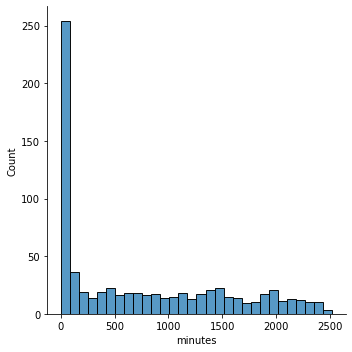

In [69]:
# Checking the distribution of the minutes played
sns.displot(test_set["minutes"], bins=30)

In [70]:
# Removing players that have played less than 450 minutes( approximately 5 games)
test_set= test_set[test_set["minutes"]>450]

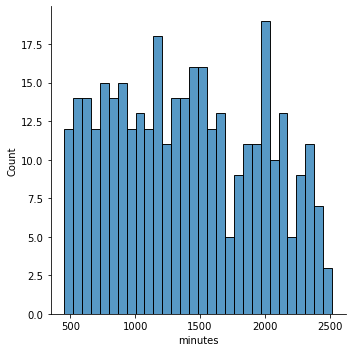

In [71]:
# Checking the distribution of the minutes played
sns.displot(test_set["minutes"], bins=30)

In [72]:
# Getting the number of players per position
test_set["position"].value_counts()

MID    152
DEF    137
FWD     45
GK      26
Name: position, dtype: int64

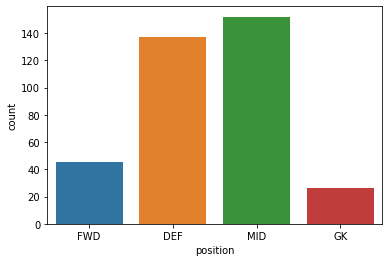

In [73]:
# Plotting the number of players against their respective positions
sns.countplot(x="position", data=test_set)
plt.show()

In [74]:
test_set.head()

,first_name,second_name,position,assists,goals_scored,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million
3,Pierre-Emerick,Aubameyang,FWD,1,4,44,1036,16,132.4,217.6,582.0,7,131,92.9,6,0,3,9.6,4.583333
4,Cédric,Soares,DEF,0,0,12,559,12,112.2,105.6,33.0,0,96,25.2,1,0,2,4.2,2.857143
5,Alexandre,Lacazette,FWD,8,3,71,1280,9,337.7,326.8,611.0,3,238,127.5,8,0,0,8.3,8.554217
6,Granit,Xhaka,MID,1,0,26,1185,19,224.9,182.0,131.0,0,148,53.8,4,1,5,4.8,5.416667
13,Thomas,Partey,MID,1,1,52,1683,20,242.0,282.8,301.0,1,271,82.8,8,0,4,5.0,10.400000


In [75]:
# Scaling the test sets
X_test = test_set.iloc[:,3:]
X_test = scaler.transform(X_test)

In [76]:
y_test = test_set.iloc[:,2:3]

In [77]:
y_test = pd.get_dummies(y_test)

In [78]:
y_test

,position_DEF,position_FWD,position_GK,position_MID
3,0,1,0,0
4,1,0,0,0
5,0,1,0,0
6,0,0,0,1
13,0,0,0,1
...,...,...,...,...
689,1,0,0,0
698,0,0,0,1
699,1,0,0,0
700,0,0,1,0


In [79]:
y_test = np.argmax(y_test.values,axis=1)

In [80]:
y_test

array([1, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 2, 0, 2, 3, 0, 1, 3,
       3, 0, 0, 3, 3, 0, 0, 1, 3, 3, 0, 3, 1, 2, 3, 0, 3, 3, 0, 0, 3, 3,
       0, 3, 3, 2, 3, 3, 0, 0, 3, 0, 0, 1, 3, 2, 3, 0, 3, 3, 1, 3, 0, 0,
       0, 3, 1, 0, 3, 3, 0, 2, 0, 3, 3, 0, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0,
       3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 0, 2, 0, 1, 3, 2, 0, 3, 1, 0, 3, 1,
       3, 3, 2, 1, 0, 3, 3, 0, 0, 0, 0, 1, 0, 0, 2, 3, 3, 3, 3, 0, 1, 0,
       0, 1, 3, 3, 3, 0, 3, 1, 2, 0, 3, 1, 0, 0, 0, 3, 3, 1, 3, 3, 0, 0,
       0, 1, 3, 3, 3, 0, 0, 3, 1, 3, 1, 0, 3, 3, 0, 3, 3, 0, 2, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 1, 0, 3, 2, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 3, 0, 2, 0, 0, 3, 0, 1, 0, 3, 3, 3, 1, 2, 3, 3, 0, 3, 0,
       3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 1, 3, 0, 0, 1, 3, 0, 0, 2, 2,
       1, 3, 0, 0, 0, 3, 0, 3, 1, 3, 3, 1, 0, 3, 0, 2, 1, 3, 3, 0, 0, 1,
       2, 3, 0, 0, 3, 1, 0, 3, 2, 2, 3, 3, 0, 3, 3, 0, 0, 1, 3, 3, 0, 0,
       0, 3, 1, 1, 0, 2, 1, 3, 0, 0, 3, 0, 3, 3, 0,

In [81]:
# Making predictions
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

In [82]:
test_set["element_predicted"] = predictions

In [83]:
test_set.head(15)

,first_name,second_name,position,assists,goals_scored,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million,element_predicted
3,Pierre-Emerick,Aubameyang,FWD,1,4,44,1036,16,132.4,217.6,582.0,7,131,92.9,6,0,3,9.6,4.583333,1
4,Cédric,Soares,DEF,0,0,12,559,12,112.2,105.6,33.0,0,96,25.2,1,0,2,4.2,2.857143,0
5,Alexandre,Lacazette,FWD,8,3,71,1280,9,337.7,326.8,611.0,3,238,127.5,8,0,0,8.3,8.554217,3
6,Granit,Xhaka,MID,1,0,26,1185,19,224.9,182.0,131.0,0,148,53.8,4,1,5,4.8,5.416667,3
13,Thomas,Partey,MID,1,1,52,1683,20,242.0,282.8,301.0,1,271,82.8,8,0,4,5.0,10.400000,3
14,Kieran,Tierney,DEF,3,1,93,1646,19,310.1,314.4,198.0,11,390,82.4,9,0,0,5.1,18.235294,0
15,Nicolas,Pépé,MID,3,1,34,552,8,194.1,114.8,323.0,1,106,63.1,2,0,0,6.9,4.927536,3
18,Emile,Smith Rowe,MID,2,9,103,1373,21,336.1,478.4,418.0,9,363,123.1,7,0,0,5.8,17.758621,3
19,Bukayo,Saka,MID,6,8,122,1910,20,637.4,533.0,877.0,11,392,204.5,11,0,4,6.5,18.769231,3
20,Gabriel,Magalhães,DEF,0,3,102,1926,20,72.0,461.0,301.0,11,454,83.3,11,1,4,5.3,19.245283,0


In [84]:
def renaming_position_2(position):
    if position == 0:
        return "DEF"
    elif position == 1:
        return "FWD"
    elif position == 2:
        return "GK"
    else:
        return "MID"

In [85]:
# Inserting the predicted position along the actual player position
test_set.insert(loc=2,column="predicted2", value=test_set["element_predicted"].apply(lambda x : renaming_position_2(x)))

In [86]:
# Previewing the top 60 players
test_set.sort_values('total_points', inplace=False, ascending=False).iloc[:60,:]

,first_name,second_name,predicted2,position,assists,goals_scored,total_points,minutes,goals_conceded,creativity,...,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,now_cost,points_per_million,element_predicted
373,Mohamed,Salah,MID,MID,11,19,212,2161,19,705.9,...,1701.0,25,620,342.7,13,0,1,13.2,16.060606,3
377,Trent,Alexander-Arnold,MID,DEF,11,2,174,2133,17,1116.1,...,402.0,31,703,221.6,14,0,1,8.5,20.470588,3
406,João Pedro Cavaco,Cancelo,DEF,DEF,8,1,153,2327,17,557.2,...,600.0,23,616,176.2,14,0,5,7.0,21.857143,0
658,Jarrod,Bowen,MID,MID,13,8,153,2361,34,537.6,...,1025.0,16,437,219.4,7,0,3,6.9,22.173913,3
568,Heung-Min,Son,MID,MID,7,11,145,1984,24,712.3,...,839.0,14,480,222.2,10,0,1,10.8,13.425926,3
369,Virgil,van Dijk,DEF,DEF,2,3,136,2250,17,117.2,...,334.0,9,610,103.0,15,0,2,6.7,20.298507,0
370,Sadio,Mané,MID,MID,4,12,134,2046,19,495.6,...,1271.0,6,396,237.9,12,0,3,11.7,11.452991,3
439,Bruno Miguel,Borges Fernandes,MID,MID,6,9,129,2307,37,1069.5,...,654.0,15,497,246.7,7,0,7,11.6,11.120690,3
411,Bernardo Mota,Veiga de Carvalho e Silva,MID,MID,6,7,128,2317,17,704.4,...,830.0,14,549,213.9,14,0,5,7.2,17.777778,3
380,Diogo,Jota,MID,MID,3,12,126,1665,14,377.6,...,999.0,5,350,190.8,11,0,2,8.3,15.180723,3
